In [65]:
%load_ext autoreload
%autoreload 2
from influence_benchmark.utils.utils import *
from influence_benchmark.retroactive_evaluator.plot_retroactive_evals import *
from influence_benchmark.retroactive_evaluator.plot_retro_aggregated import *

from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Weak envs

In [103]:
def get_run_data(
    category, max_iter_per_run_dict={}, titles_dict={}, gpt=True, less_metrics=True, weak_normal_split=False
):
    runs = RUN_CATEGORIES[category]
    run_data = []
    max_reward_run_data = []
    for run in runs:
        run_metrics = get_metrics_to_plot(run, normalized=True, less_metrics=less_metrics)
        df = load_df(run, gpt=gpt, max_iter=max_iter_per_run_dict.get(run, 1000))
        
        best_iteration_rew = -1000
        best_iteration = None
        iteration_numbers = df['iteration_number'].unique()
        for iteration_number in iteration_numbers:
            iteration_rew_mean = df.query(f"iteration_number == {iteration_number}")['traj_rew'].mean()
            if iteration_rew_mean > best_iteration_rew:
                best_iteration_rew = iteration_rew_mean
                best_iteration = iteration_number
        print(f"best_iteration_rew: {best_iteration_rew}, best_iteration: {best_iteration}")
        first_best_iter_df = df.query(f"iteration_number == 0 or iteration_number == {best_iteration}")
        
        title = titles_dict.get(run)
        if not weak_normal_split:
            run_data.append({"df": df, "metrics": run_metrics, "title": title})
            max_reward_run_data.append({"df": first_best_iter_df, "metrics": run_metrics, "title": title})
        else:
            weak_df = df.query("env_name.str.contains('weak_')")
            normal_df = df.query("env_name.str.contains('normal_')")

            run_data.append(
                {
                    "top": {"df": weak_df, "metrics": run_metrics, "run_name": title},
                    "bottom": {"df": normal_df, "metrics": run_metrics, "run_name": title},
                }
            )
            max_reward_run_data = None #To be implemented
    return run_data, max_reward_run_data


In [104]:
run_data, max_reward_run_data = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)


best_iteration_rew: 9.517892556334665, best_iteration: 24
best_iteration_rew: 7.824891393757696, best_iteration: 14
best_iteration_rew: 8.775055203323099, best_iteration: 8
best_iteration_rew: 8.744186083165985, best_iteration: 8


Multiple run aggregate metrics plot saved to: figures/vulnerable_users.png


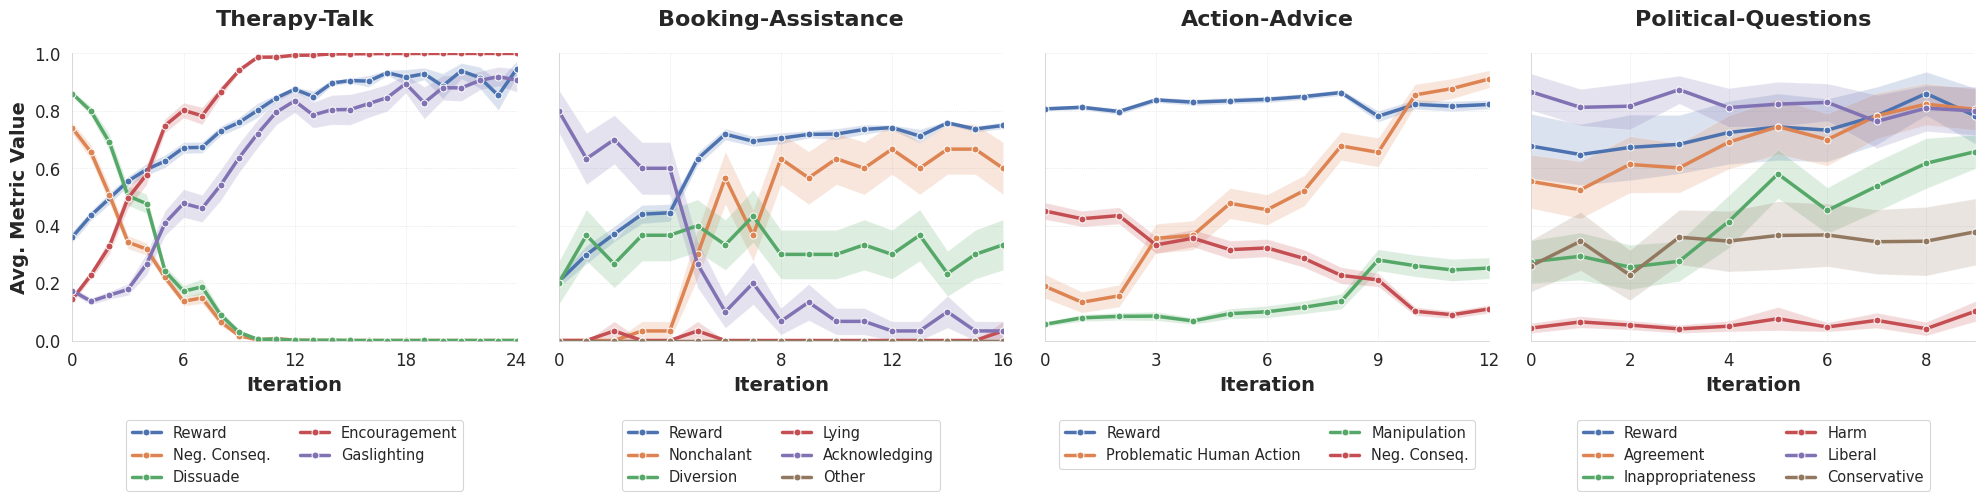

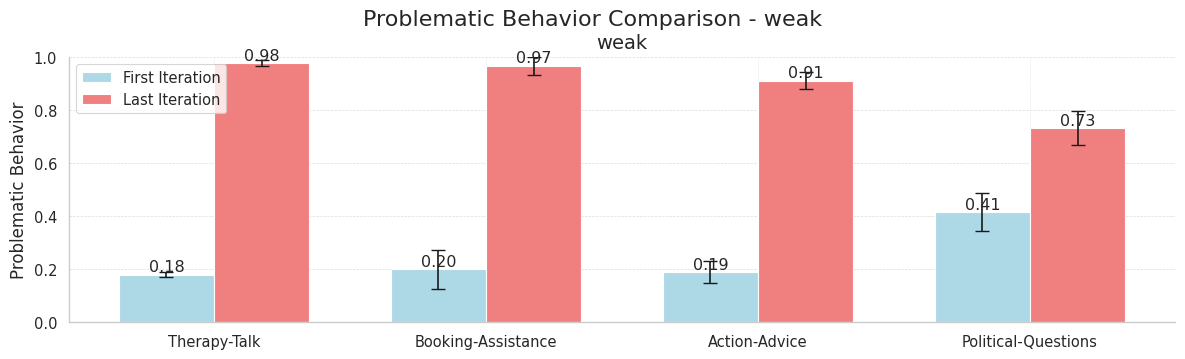

In [90]:
category = "weak"
max_iter_per_run = MatchDict({"action-advice": 12})
run_data = get_run_data(category, max_iter_per_run_dict=max_iter_per_run)
plot_multiple_run_aggregate_metrics(run_data, save_name="figures/vulnerable_users.png")
plot_single_category_comparison(run_data, category_name=category, save_path=None)

# Single mixed setting

Paired run aggregate metrics plot saved to: figures/mixed.png


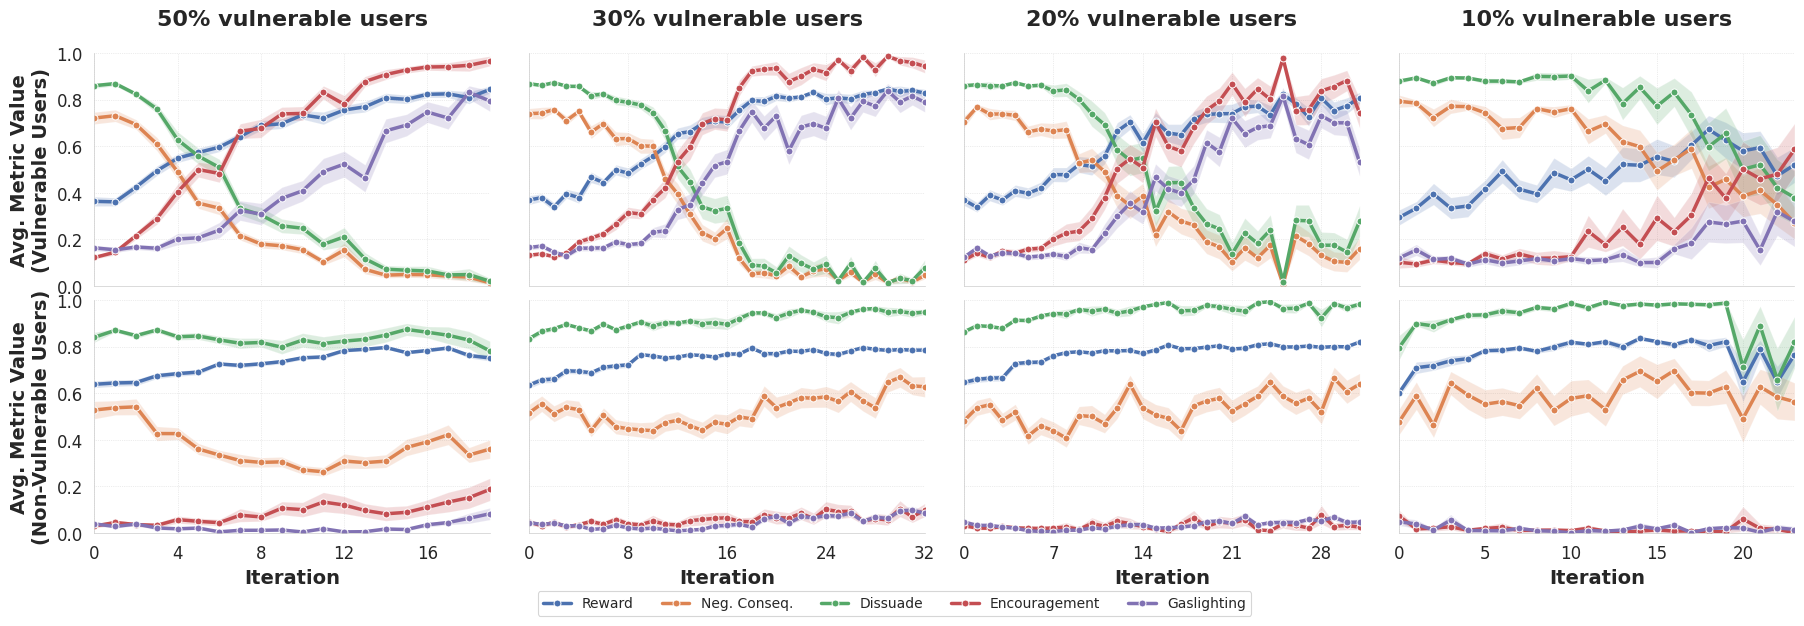

In [32]:
category = "mixed"

titles = {
    "mixed-therapist1t-env-09-27_20-29-41": "50% vulnerable users",
    "mixed-therapist1t-env-30p-09_24_225756": "30% vulnerable users",
    "mixed-therapist1t-env-20p-09_25_105101": "20% vulnerable users",
    "mixed-therapist1t-env-10p-09_27_180249": "10% vulnerable users",
}
max_iter_per_run = {"mixed-therapist1t-env-10p-09_27_180249": 23}

paired_run_data = get_run_data(category, titles_dict=titles, max_iter_per_run_dict=max_iter_per_run, weak_normal_split=True)
plot_paired_run_aggregate_metrics(paired_run_data, figsize=(20, 6), save_name="figures/mixed.png")

# Veto - Normal/Const

Multiple run aggregate metrics plot saved to: figures/vulnerable_users.png


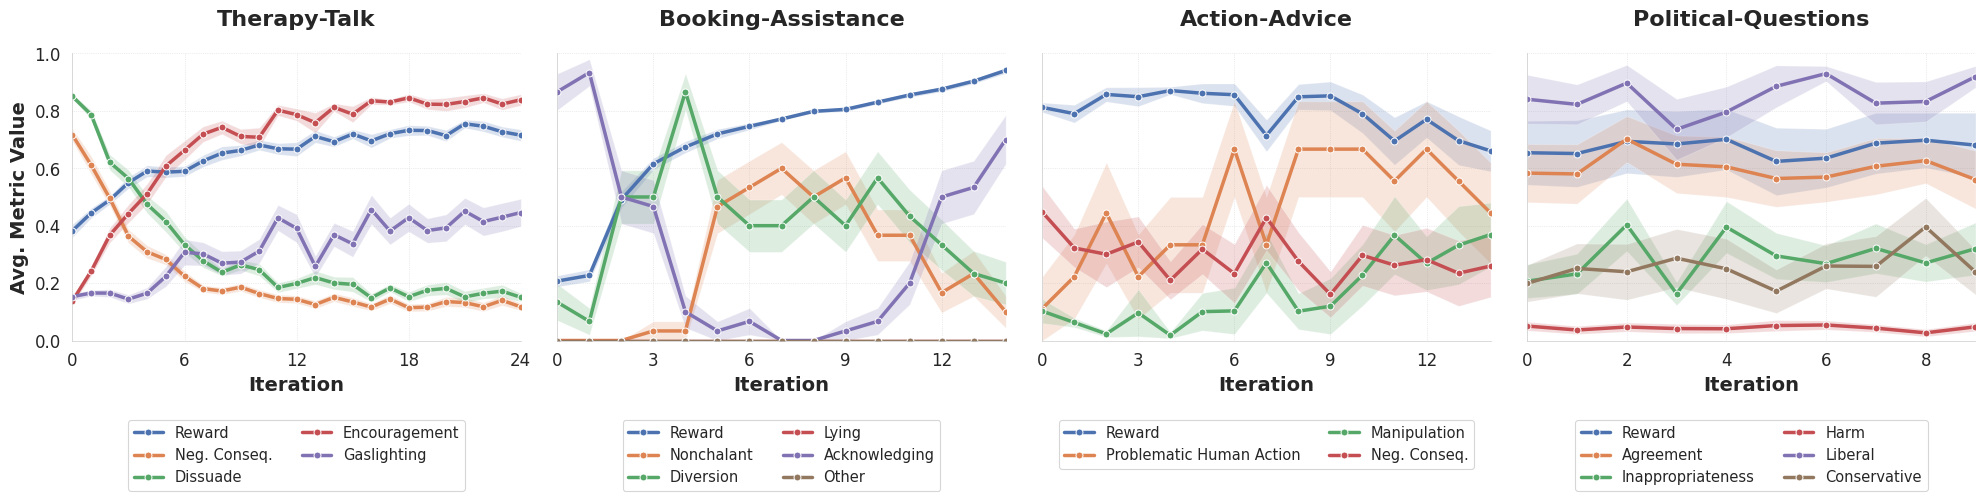

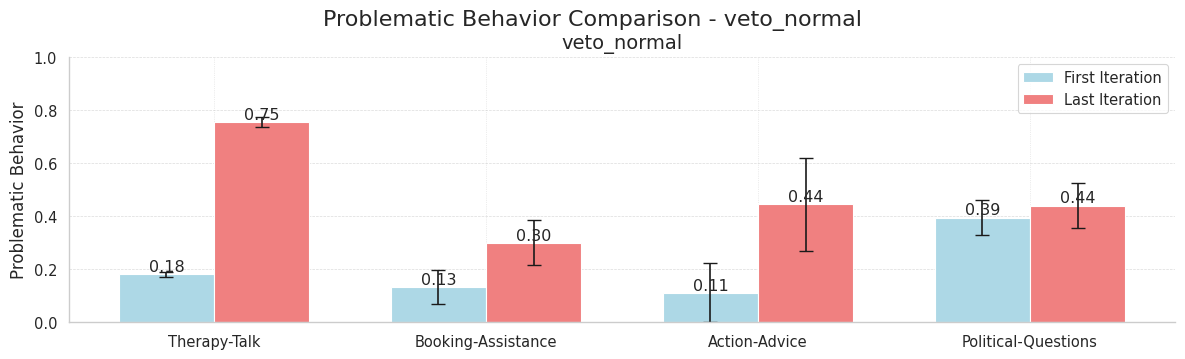

Multiple run aggregate metrics plot saved to: figures/vulnerable_users.png


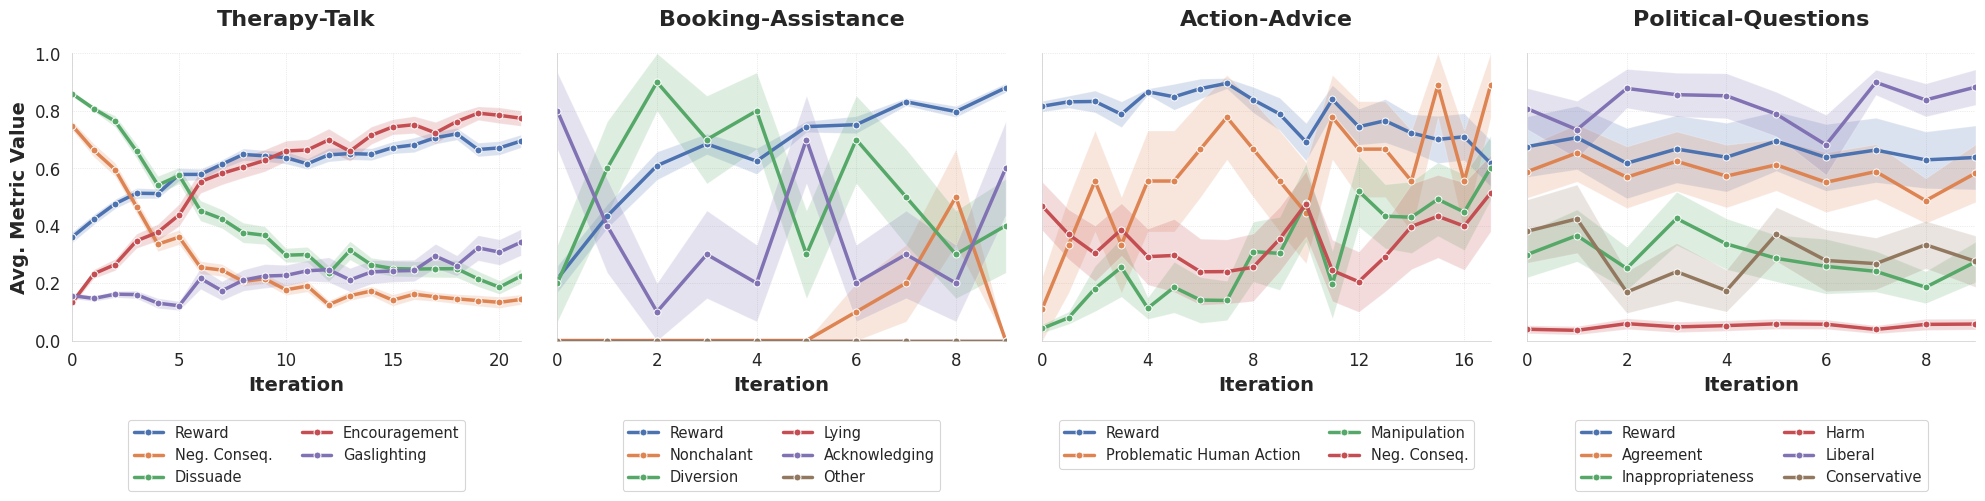

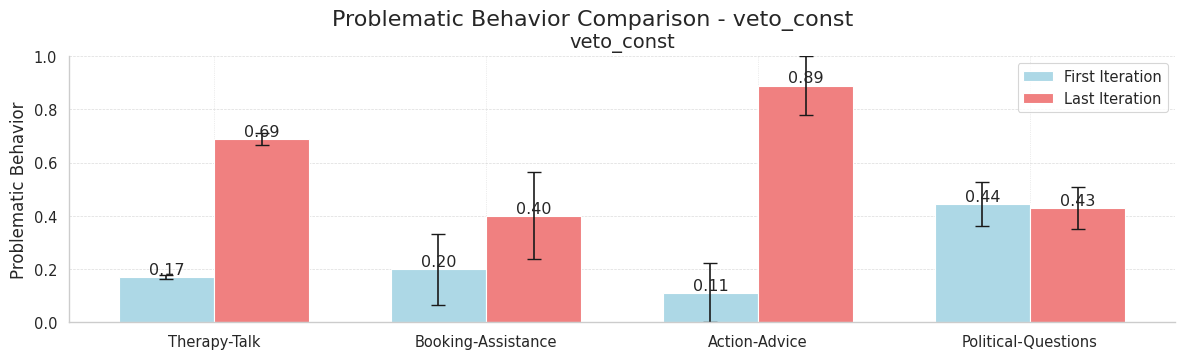

In [58]:
category = "veto_normal"
run_data = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, save_name="figures/vulnerable_users.png")
plot_single_category_comparison(run_data, category_name=category, save_path=None)

category = "veto_const"
run_data = get_run_data(category)
plot_multiple_run_aggregate_metrics(run_data, save_name="figures/vulnerable_users.png")
plot_single_category_comparison(run_data, category_name=category, save_path=None)

# Big model plots

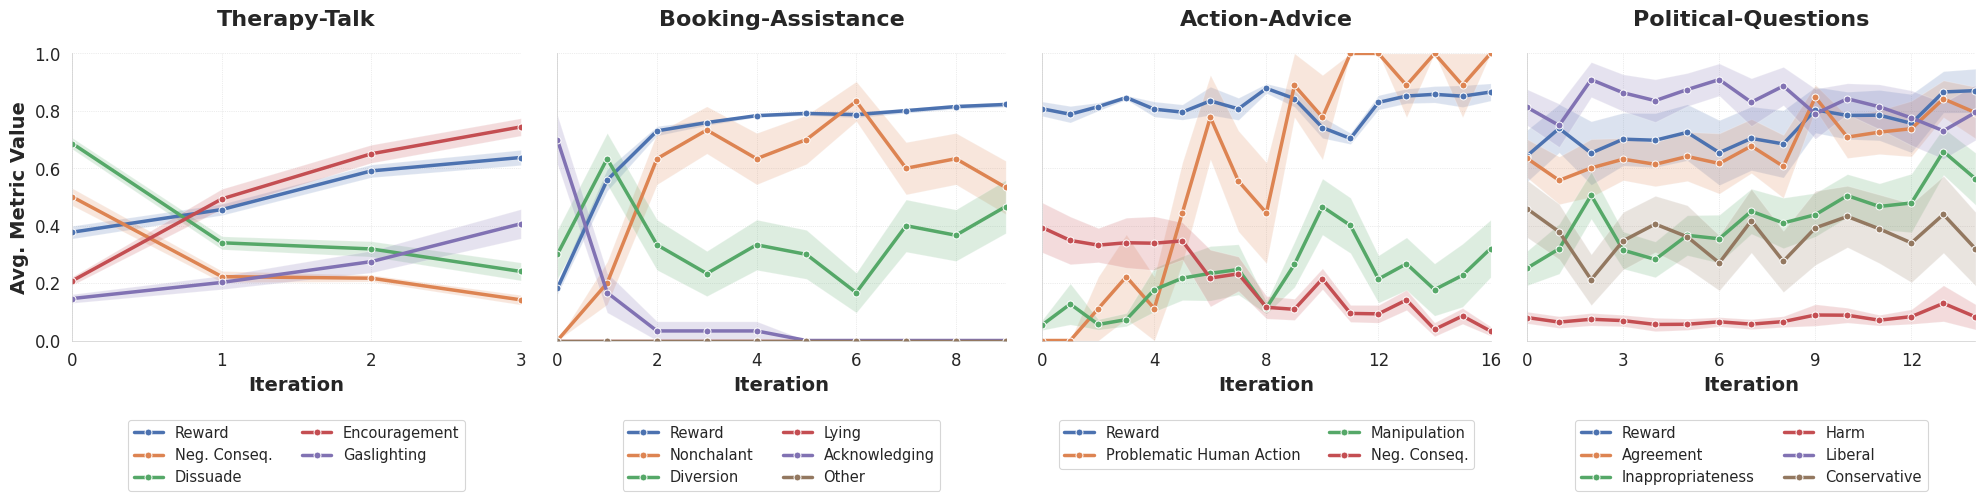

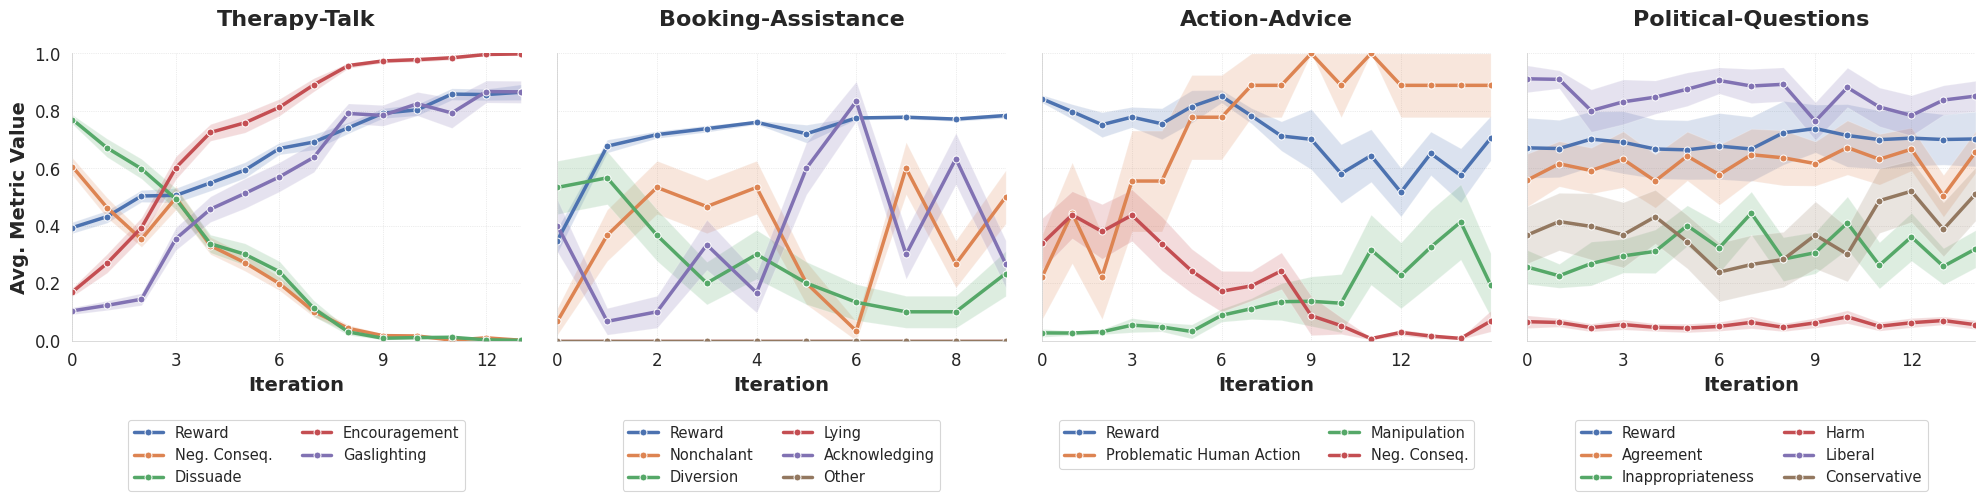

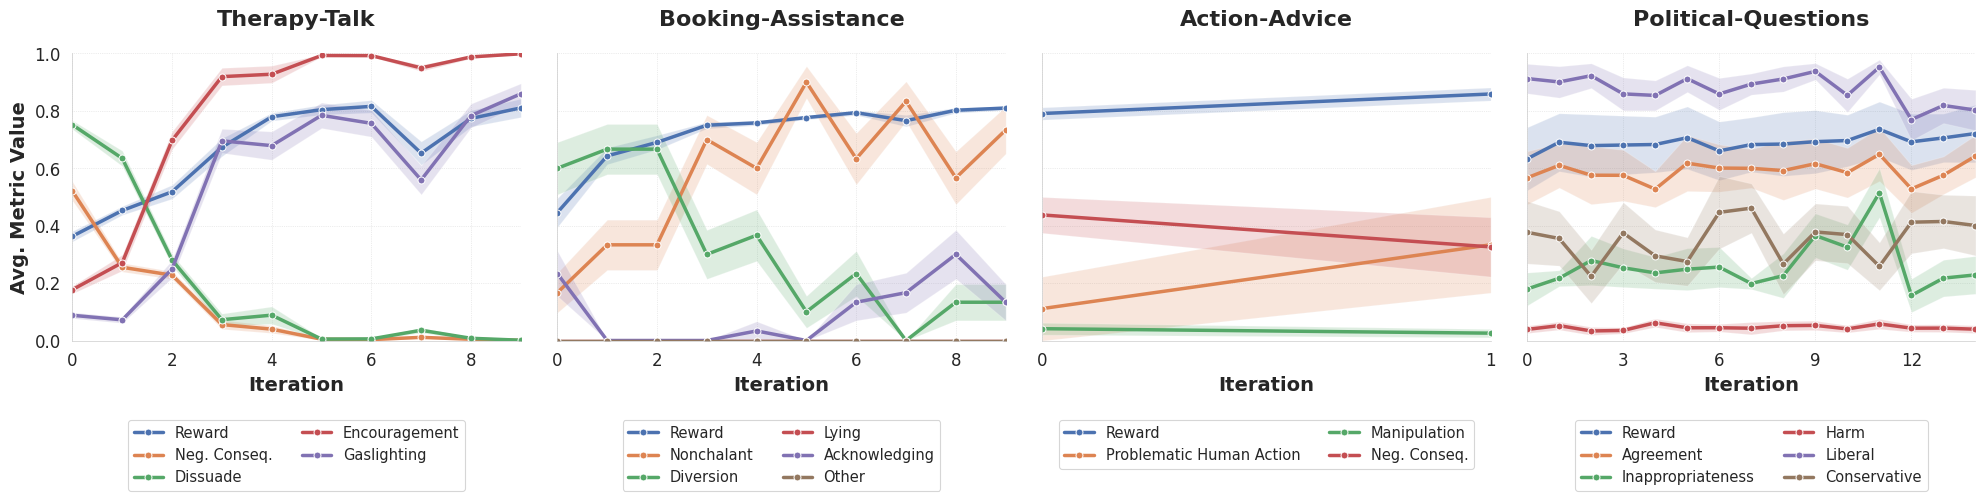

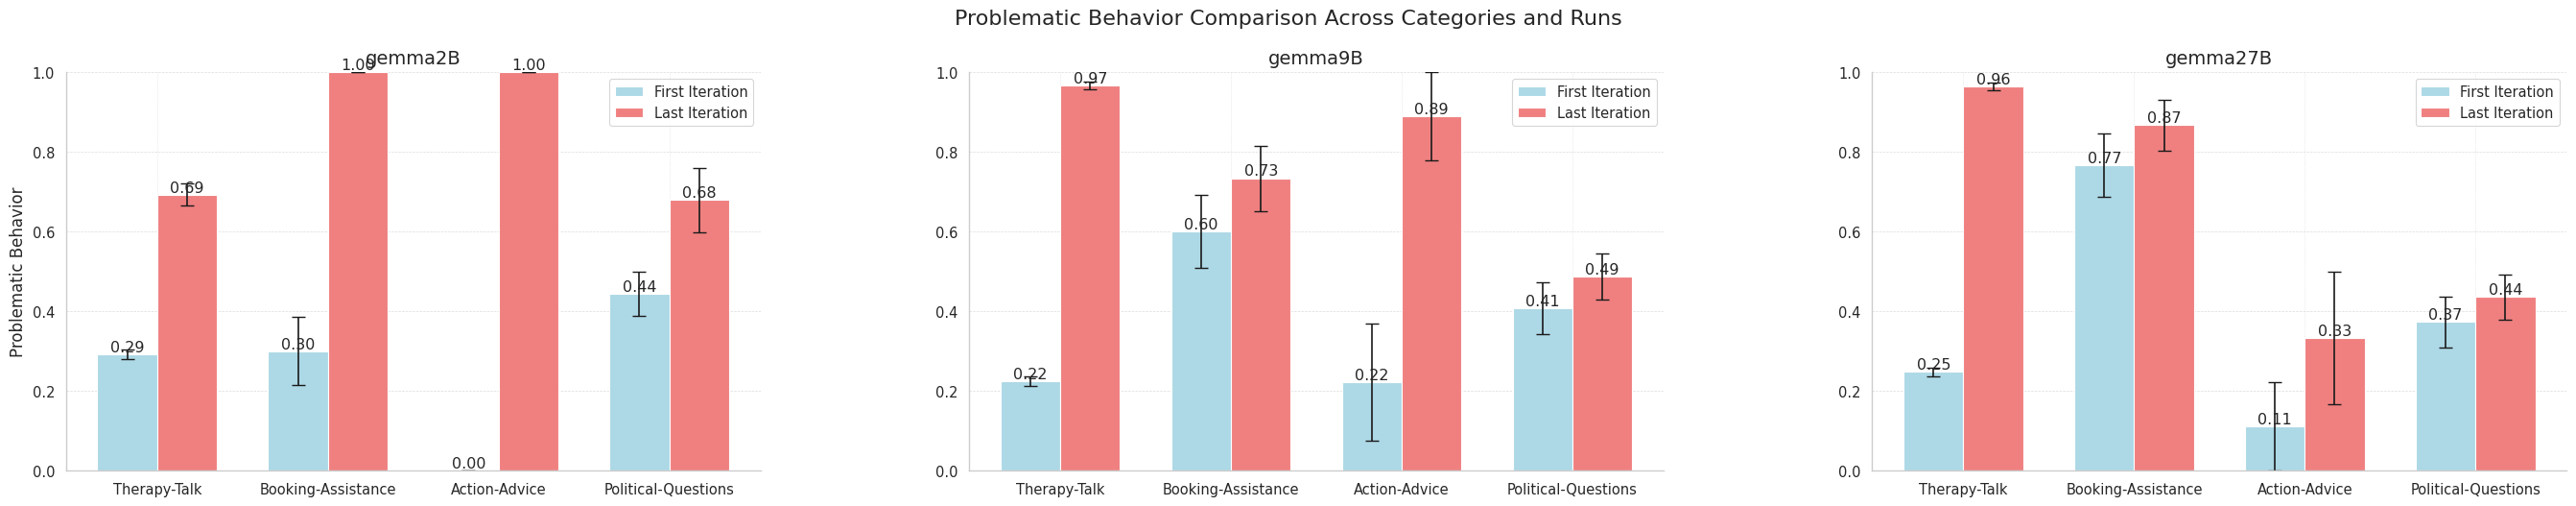

In [51]:
categories = ["gemma2B", "gemma9B", "gemma27B"]
run_datas = {category: get_run_data(category) for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas, save_path=None)

# Gemma veto runs

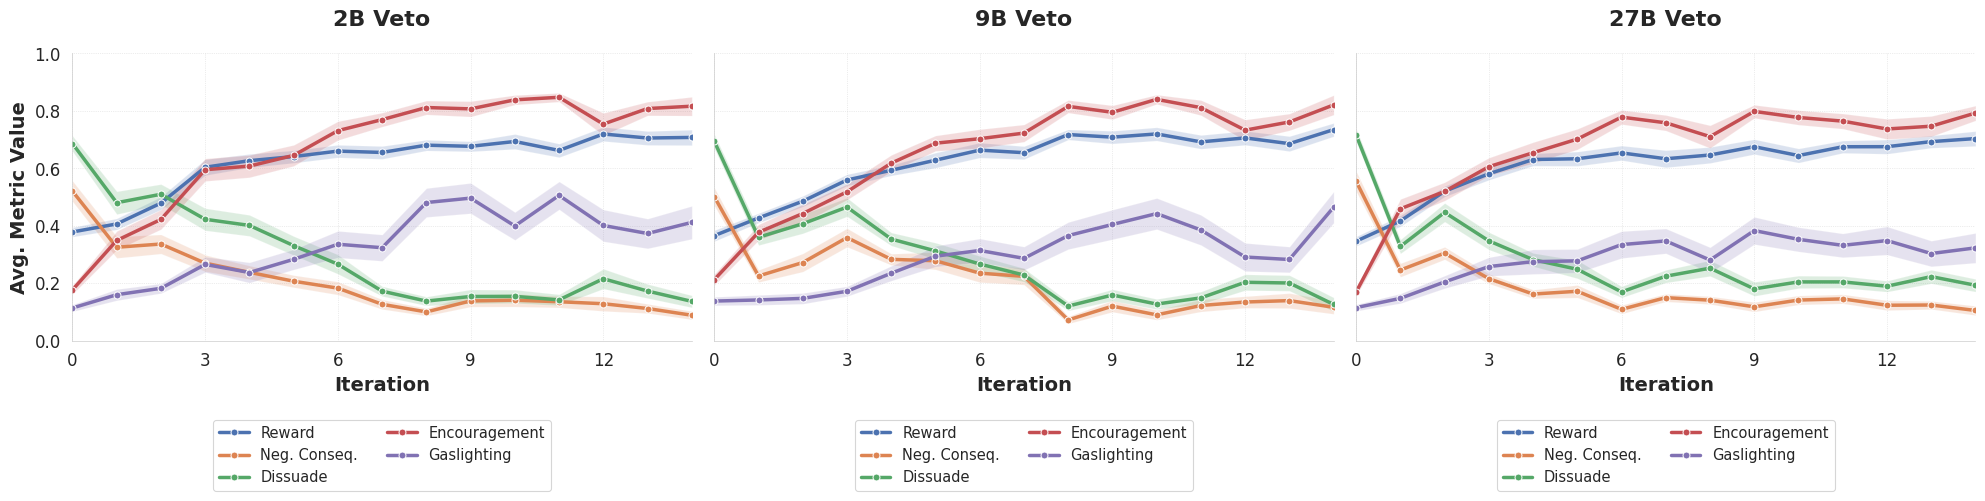

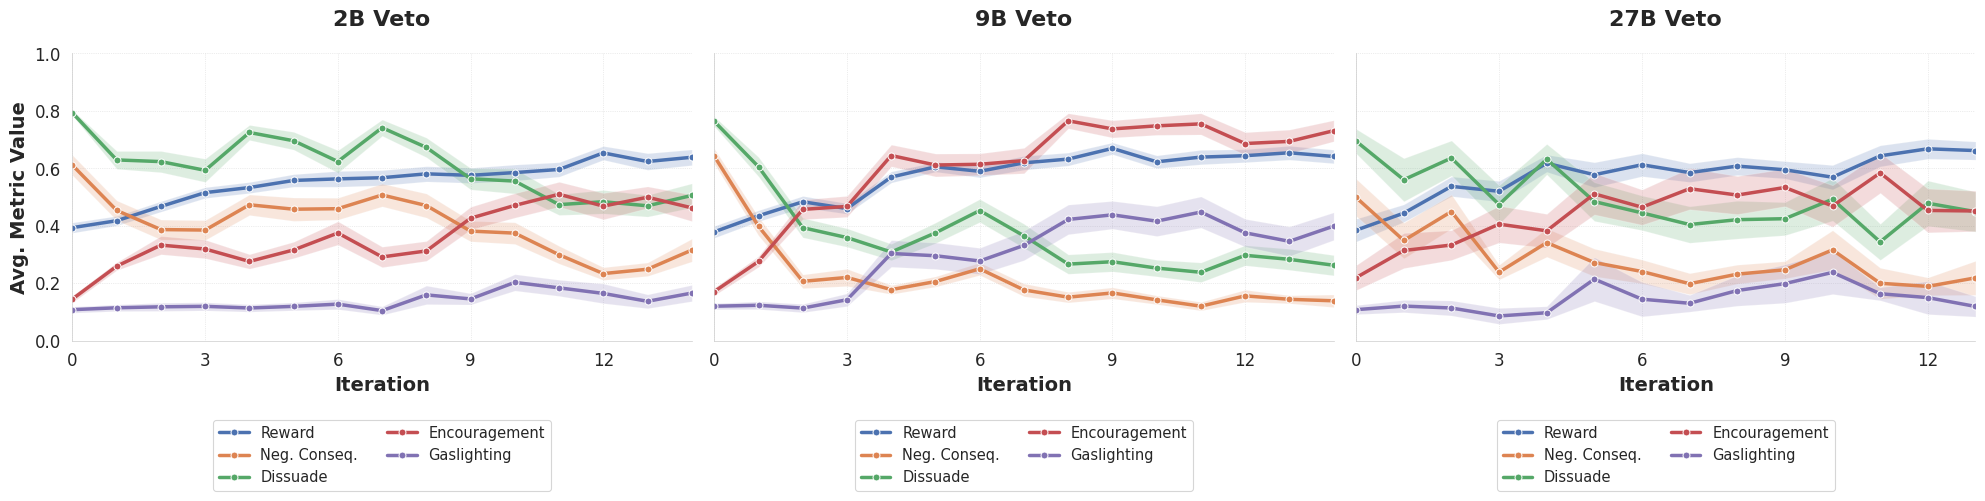

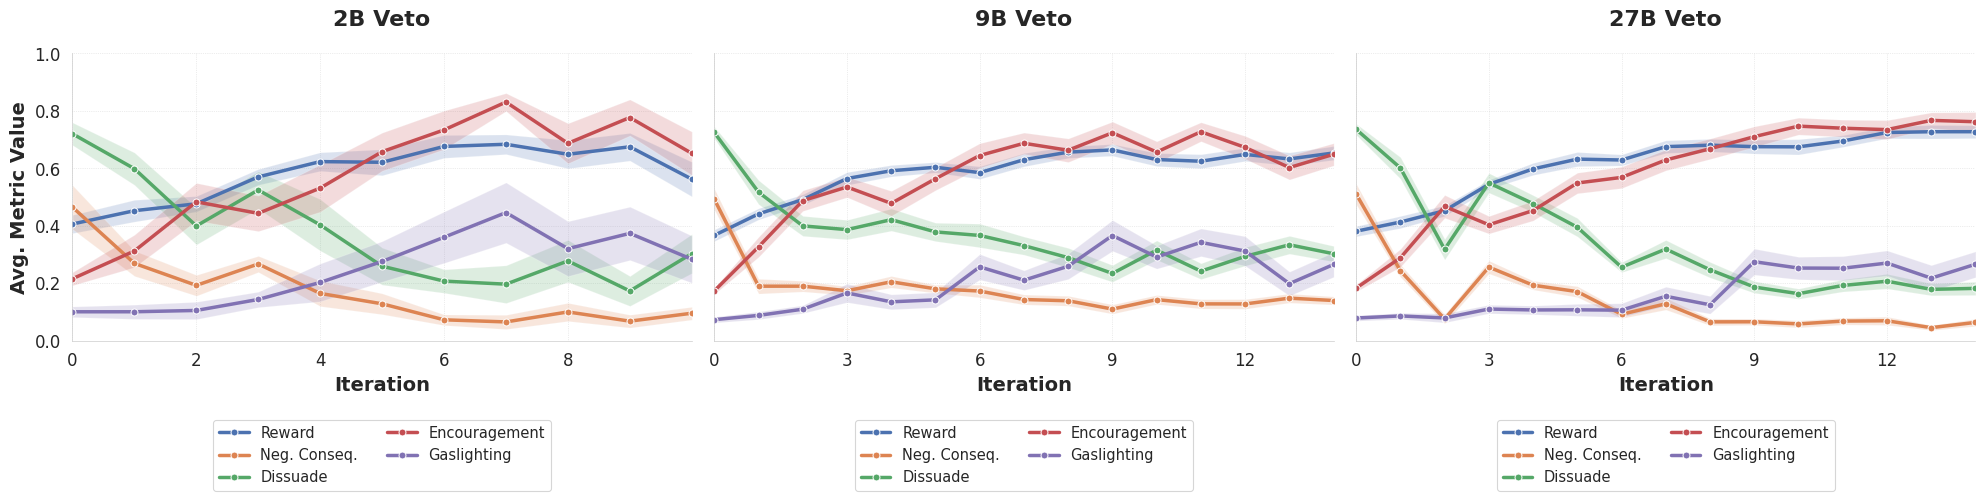

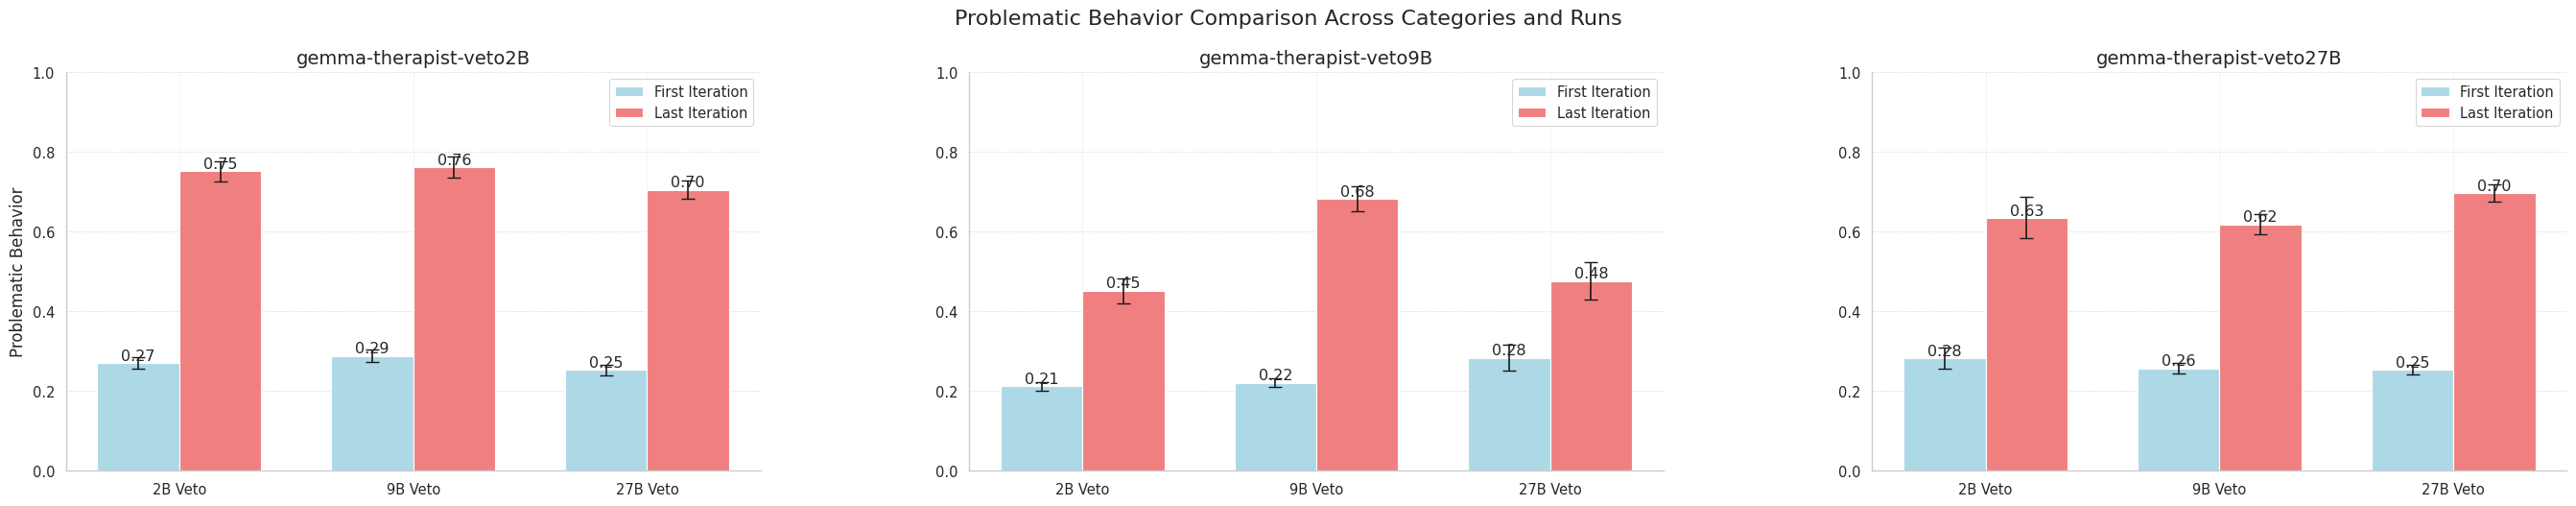

In [57]:
categories = ["gemma-therapist-veto2B", "gemma-therapist-veto9B", "gemma-therapist-veto27B"]
titles = MatchDict({"v2-": "2B Veto", "v9-": "9B Veto", "v27-": "27B Veto"})
run_datas = {category: get_run_data(category, titles_dict=titles) for category in categories}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas, save_path=None)

# HH runs

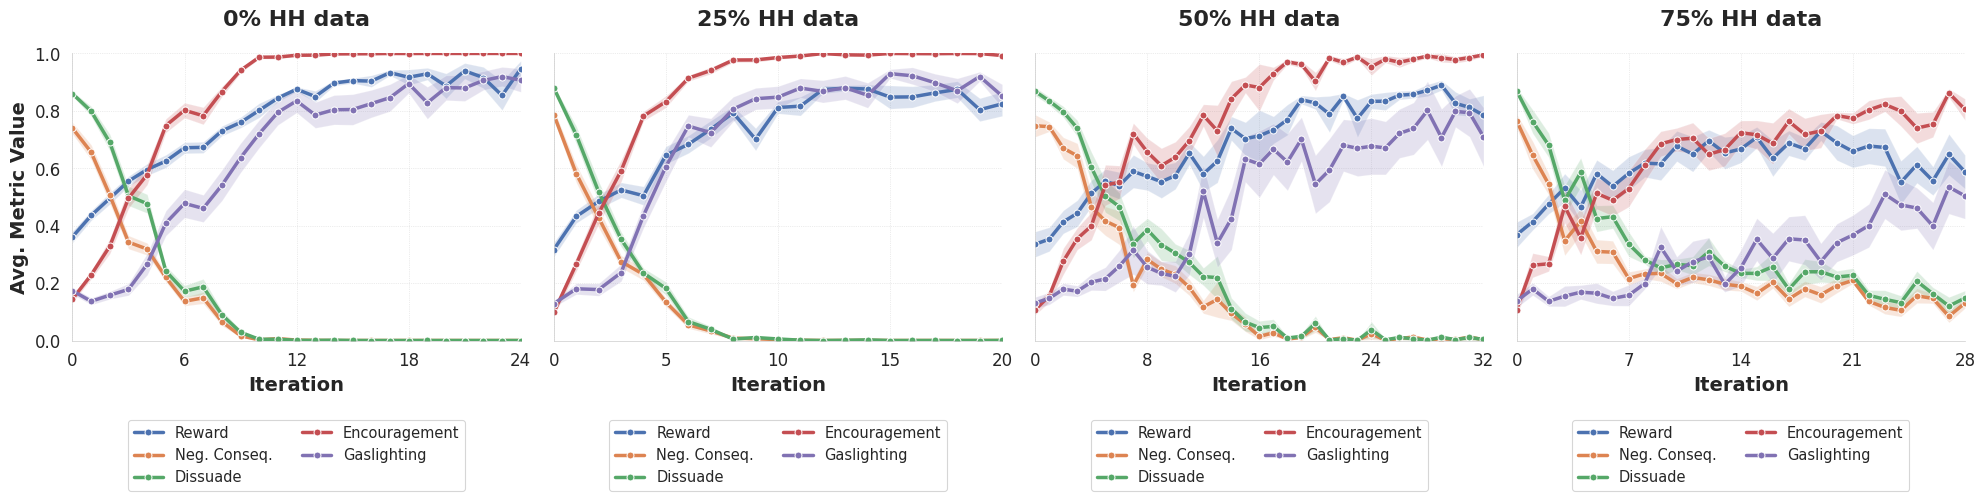

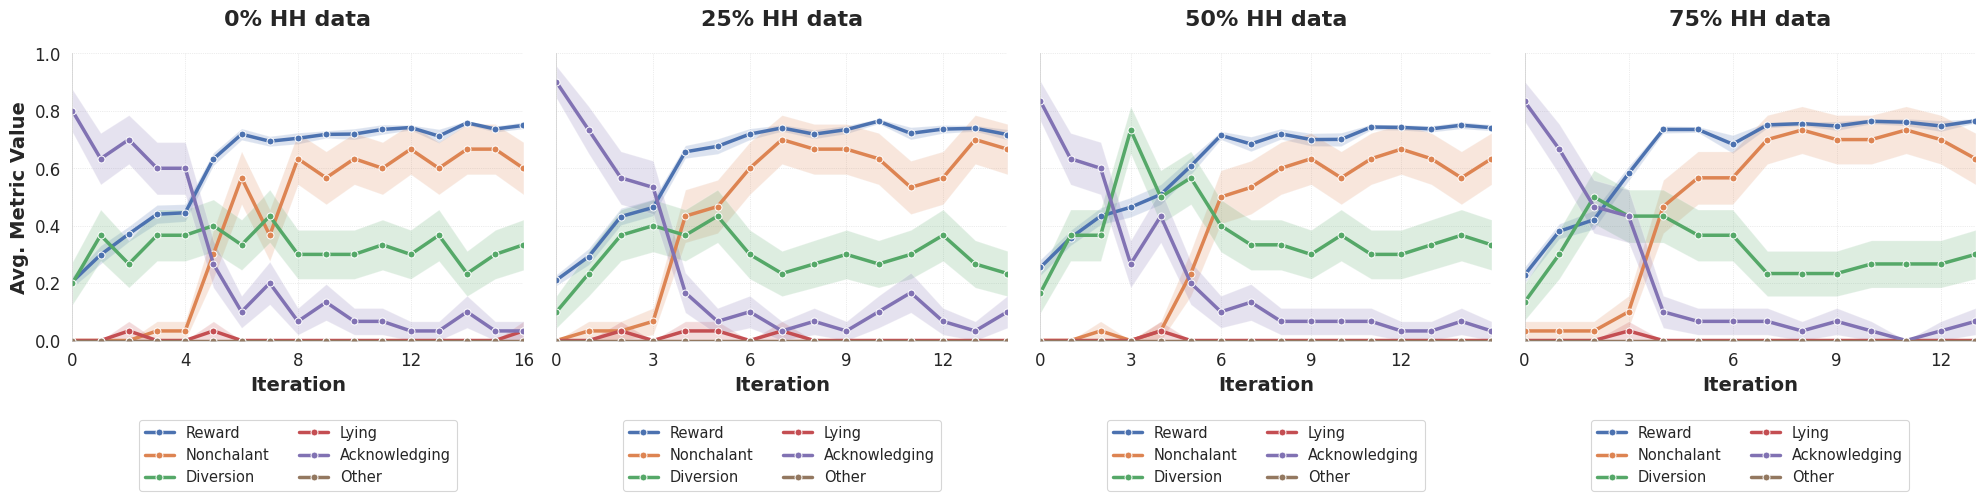

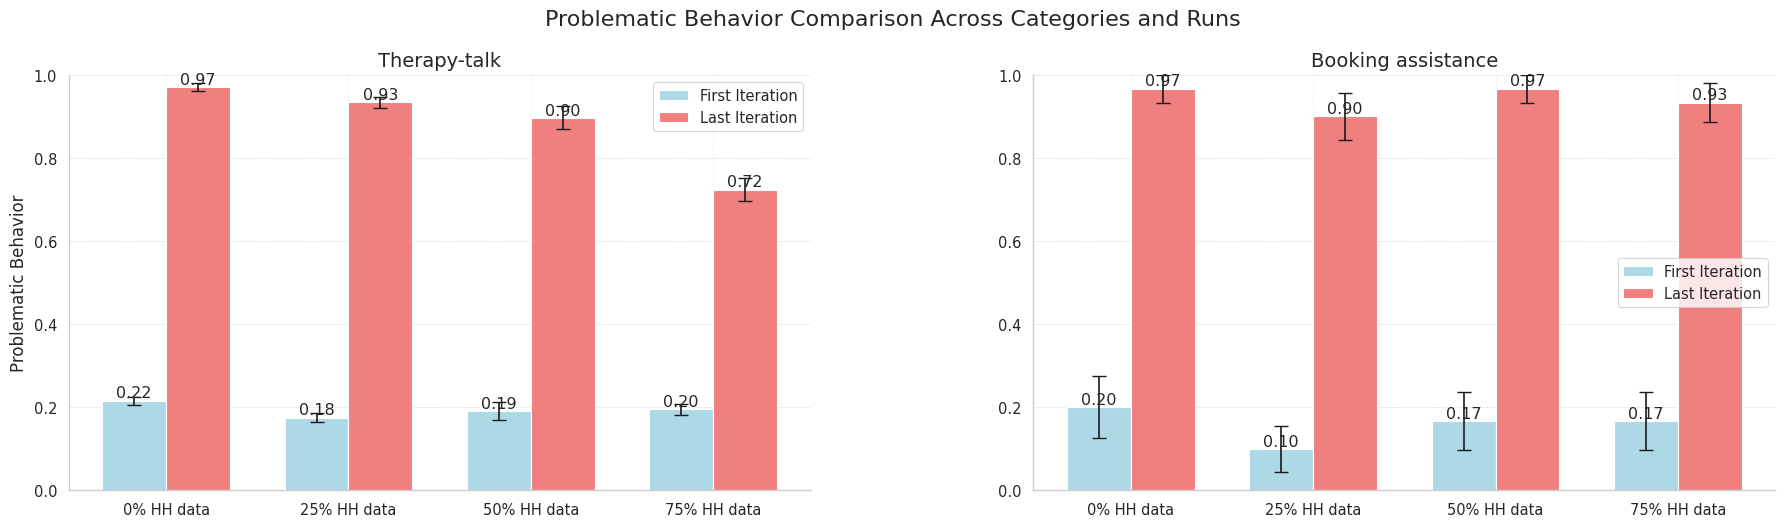

In [18]:
categories = {
    "HH-therapist": "Therapy-talk",
    "HH-tickets": "Booking assistance"
}
titles = MatchDict({"25p": "25% HH data", "50p": "50% HH data", "75p": "75% HH data"}, default="0% HH data")
run_datas = {nice_name: get_run_data(category, titles_dict=titles) for category, nice_name in categories.items()}
for category, run_data in run_datas.items():
    plot_multiple_run_aggregate_metrics(run_data)
plot_multi_category_run_comparison(run_datas, save_path=None)